# Initial Data Analysis of German Credit Score Dataset

This is notebook for Practice Case 01 of Data Science Bootcamp Days 4 at iykra. <br>
<br>The dataset avaiable at [here](https://github.com/arikunco/GermanCredit/tree/master/dataset). <br>
<br>
**Part A:** There are 10 questions regarding the dataset. <br>
**Part B:** More 10 questions about the dataset. <br>
**Part C:** 3 business problems that finding on dataset. 
<br>
<br>The answers are below.
<br>
<br>
Author : Herdis Haerusalam <br>
Date: 24 Oktober 2019

In [216]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(color_codes=True)

In [10]:
# Read data from csv file
data = pd.read_csv('german_credit_data_with_risk.csv', encoding =  'Latin1')

In [13]:
# brief of the data

data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


# Part A

## How many rows and columns reflected in the dataset?

In [34]:
rows = data.shape[0]
cols = data.shape[1]

print('There are ' + str(rows) + ' Rows')
print('There are ' + str(cols) +' Columns')

There are 1000 Rows
There are 11 Columns


## What is the minimum, maximum, and mean of the customer's age?

In [35]:
max_age  = data['Age'].max()
min_age  = data['Age'].min()
mean_age = data['Age'].mean()

print('The minimum of Age in the dataset is ' + str(min_age) + ' years old')
print('The maximum of Age in the dataset is ' + str(max_age) + ' years old')
print('The mean of Age in the dataset is ' + str(mean_age) + ' years old')

The minimum of Age in the dataset is 19 years old
The maximum of Age in the dataset is 75 years old
The mean of Age in the dataset is 35.546 years old


## How many are male and how many are female? Why?

In [53]:
male_data = data[data['Sex'] == 'male']['Sex'].value_counts()
female_data = data[data['Sex'] == 'female']['Sex'].value_counts()

print('There are ' + str(male_data[0]) + ' male customers')
print('There are ' + str(female_data[0]) + ' female customers')

There are 690 male customers
There are 310 female customers


## How many high skilled workers customers reflected in the dataset? 

In [70]:
high_skilled_data = data[data['Job'] == 3]['Job'].value_counts()

print('There are ' + str(high_skilled_data[3]) + ' high skilled workers customers')

There are 148 high skilled workers customers


## How many customers who own the house?

In [79]:
own_house_data = data[data['Housing'] == 'own']['Housing'].value_counts()

print('There are ' + str(own_house_data[0]) + ' customers who own houses')

There are 713 customers who own houses


## How many customers who have 'rich' Saving accounts? 


In [82]:
saving_rich_data = data[data['Saving accounts'] == 'rich']['Saving accounts'].value_counts()

print('There are ' + str(saving_rich_data[0]) + ' customers who have rich saving account')

There are 48 customers who have rich saving account


## How many customers who do not have checking accounts or have zero checking account? 

In [145]:
nan_value_data = data['Checking account'].isnull().sum()

print('There are ' + str(nan_value_data) + ' customers who dont have checking account')

There are 394 customers who dont have checking account


## Who is the one who have highest credit amount? Show us the profile of the age, sex, job, housing, saving account, and checking account!

In [132]:
customer_highest_credit = data.sort_values(by='Credit amount', ascending=False).head(1)
customer_highest_credit

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
915,915,32,female,3,own,little,moderate,18424,48,vacation/others,bad


## How many customers are classified as good risk and bad risk? 


In [151]:
good_risk = data[data['Risk'] == 'good']['Risk'].value_counts()
bad_risk = data[data['Risk'] == 'bad']['Risk'].value_counts()

print('There are ' + str(good_risk[0]) + ' customers who classifed as good risk')
print('There are ' + str(bad_risk[0]) + ' customers who classifed as good risk')

There are 700 customers who classifed as good risk
There are 300 customers who classifed as good risk


## Is the average of credit amount for good risk is higher than bad risk?

In [182]:
# Calculating average credit amount for good risk
mean_credit_amount_good = data[data['Risk'] == 'good']['Credit amount'].mean()
mean_credit_amount_good

# Calculating average credit amount for bad risk
mean_credit_amount_bad = data[data['Risk'] == 'bad']['Credit amount'].mean()
mean_credit_amount_bad

# Doing conditional statement to check, is average of credit amount for good risk is higher than basd risk
if mean_credit_amount_good > mean_credit_amount_bad :
    print('The average credit amount for good risk is higher than bad risk')
else:
    print('The average credit amount for good risk is lower than bad risk')

The average credit amount for good risk is lower than bad risk


# Part B

In [203]:
# Brief of data
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


## Is customers classifed as good mostly own house or not?

In [213]:
# Own house for good customers
own_house_good = data[(data['Risk'] == 'good') & (data['Housing'] == 'own' )]['Housing']
own_house_good.value_counts()

own    527
Name: Housing, dtype: int64

In [211]:
# Rent house for good customers
rent_house_good = data[(data['Risk'] == 'good') & (data['Housing'] == 'rent' )]['Housing']
rent_house_good.value_counts()

rent    109
Name: Housing, dtype: int64

In [210]:
# Free house for good customers
free_house_good = data[(data['Risk'] == 'good') & (data['Housing'] == 'free' )]['Housing']
free_house_good.value_counts()

free    64
Name: Housing, dtype: int64

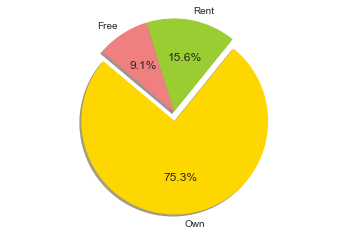

In [227]:
# Data to plot
labels = 'Own', 'Rent', 'Free'
sizes = [own_house_good.value_counts()[0], rent_house_good.value_counts()[0],free_house_good.value_counts()[0] ]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Mostly customers who are classifed as good customer have own house with pecentage 75.3 %

## How about the customers classifed as bad mostly own house or not?

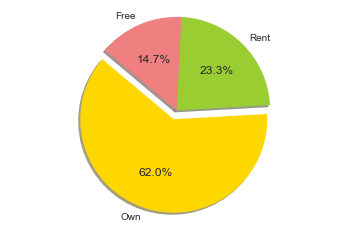

In [230]:
# Own house for bad customers
own_house_bad = data[(data['Risk'] == 'bad') & (data['Housing'] == 'own' )]['Housing']

# rent house for bad customers
rent_house_bad = data[(data['Risk'] == 'bad') & (data['Housing'] == 'rent' )]['Housing']

# free house for bad customers
free_house_bad = data[(data['Risk'] == 'bad') & (data['Housing'] == 'free' )]['Housing']

# Data to plot
labels = 'Own', 'Rent', 'Free'
sizes = [own_house_bad.value_counts()[0], rent_house_bad.value_counts()[0],free_house_bad.value_counts()[0] ]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Mostly customers who are classifed as bad customer have own house with pecentage 62.0 %

## What the purpose that have high frequency?

In [254]:
purpose_freq = data['Purpose'].value_counts()
purpose_freq

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

Purpose for car loan is the most of credit purpose in dataset.

## How many and percentage customers that classifed as good/bad risk who purpose credit for car?

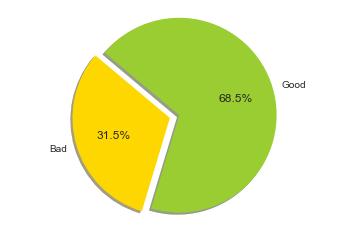

There are 231 customers who classifed as good customer who have purpose for car credit with 68.5 %
There are 106 customers who classifed as bad customer who have purpose for car credit 31.5 %


In [269]:
data_purpose_car = data[data['Purpose'] == 'car'].groupby(by='Risk')['Risk'].value_counts()

# Data to plot
labels = 'Bad', 'Good'
sizes = [data_purpose_car[0], data_purpose_car[1] ]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

print('There are ' + str(data_purpose_car[1])+ ' customers who classifed as good customer who have purpose for car credit with 68.5 %')
print('There are ' + str(data_purpose_car[0])+ ' customers who classifed as bad customer who have purpose for car credit 31.5 %')

## How many the average loan duration in dataset?

In [274]:
mean_loan = data['Duration'].mean()

print('The average duration is ' + str(mean_loan)+' months')

The average duration is 20.903 months


## How many average duration of loan for each good and bad risk?

In [277]:
mean_loan_good = data[data['Risk'] == 'good']['Duration'].mean()
mean_loan_bad = data[data['Risk'] == 'bad']['Duration'].mean()

print('The average duration for good risk is ' + str(mean_loan_good)+' months')
print('The average duration for bad risk is ' + str(mean_loan_bad)+' months')

The average duration for good risk is 19.207142857142856 months
The average duration for bad risk is 24.86 months


## What the maximum and minimum loan duration at dataset?

In [281]:
max_loan = data['Duration'].max()
min_loan = data['Duration'].min()

print('The average duration for good risk is ' + str(max_loan)+' months')
print('The average duration for bad risk is ' + str(min_loan)+' months')

The average duration for good risk is 72 months
The average duration for bad risk is 4 months


## How many customes who have good risk based on gender?

In [304]:
male_risk_good = data[(data['Sex'] == 'male') & (data['Risk'] == 'good')]['Sex'].value_counts()
female_risk_good = data[(data['Sex'] == 'female') & (data['Risk'] == 'good')]['Sex'].value_counts()

print('There are ' + str(male_risk_good[0])+' male customer who classifed as good risk')
print('There are ' + str(female_risk_good[0])+' female customer who classifed as good risk')

There are 499 male customer who classifed as good risk
There are 201 female customer who classifed as good risk


## What is the most job customer that classifed as good or bad?

In [317]:
job_good = data[data['Risk'] == 'good']['Job'].value_counts()
job_bad = data[data['Risk'] == 'bad']['Job'].value_counts()

job_good

2    444
1    144
3     97
0     15
Name: Job, dtype: int64

In [318]:
print('The most of good customers are skilled customers')

The most of good customers are skilled customers


In [314]:
job_bad

2    186
1     56
3     51
0      7
Name: Job, dtype: int64

In [319]:
print('The most of bad customers are skilled customers')

The most of bad customers are skilled customers


## What the most of puspose of loan who classifed as bad risk customer?

In [323]:
bad_purpose = data[data['Risk'] == 'bad']['Purpose'].value_counts()
bad_purpose

car                    106
radio/TV                62
furniture/equipment     58
business                34
education               23
repairs                  8
vacation/others          5
domestic appliances      4
Name: Purpose, dtype: int64

The most of customer who classifed as bad customers are car laon with 104 frequency.

# Part C

## If we assume that good customer will payback the loan amount, what the crieteria (demography, credit amount, loan amount, etc) that we can predict based on that data? How?

## Is there are some segmentation based on dataset? if we can offer product to customer that have good track record (based on good risk/return laon amount) we can increase company revenue based on this dataset.

## if we assume that bad customer will have probability to not return the loan amount. How we can reduce kind of this customers.